In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame({
  "Accessories": ["Laptop", "Laptop", "Ipad", "Ipad", "Laptop", "Laptop"],
  "customer": ["Andrew",  "ATome",  "Andrew", "ARine", 'Renee', "Peter"],
  "quantity": [1, 3, 2, 3, 4, 2],
})

In [79]:
df["customer"].fillna("Anon", inplace=True)

In [80]:
df['quantity'].median()

2.5

In [10]:
dfvalid_username_mask = df['customer'].str.startswith('A') & df['customer'].str.endswith('e')

In [12]:
df[dfvalid_username_mask]

,Accessories,customer,quantity
1,Laptop,ATome,3
3,Ipad,ARine,3


In [82]:
df.loc[[3]].isna().sum().sum()

0

In [83]:
df['customer'], df['quantity'] = df['customer'].astype('str'), df['quantity'].astype('int64')

In [84]:
df.groupby(['Accessories', 'customer']).quantity.sum()

Accessories  customer
Ipad         Andrew      2
             Rin         3
Laptop       Andrew      1
             Peter       2
             Renee       4
             Tom         3
Name: quantity, dtype: int64

In [85]:
list(df.iloc[1])

['Laptop', 'Tom', 3]

In [86]:
def is_null(x): 
        return sum(x.isnull())

In [87]:
print(len(df.iloc[0]))
null_sum = list(df.apply(lambda x:sum(x.isnull()), axis=1))

3


In [88]:
for i in range(len(null_sum)):
    if null_sum[i]==len(df.iloc[0]):
        df.drop([i], inplace=True)


In [89]:
df

,Accessories,customer,quantity
0,Laptop,Andrew,1
1,Laptop,Tom,3
2,Ipad,Andrew,2
3,Ipad,Rin,3
4,Laptop,Renee,4
5,Laptop,Peter,2


In [90]:
df.loc[[3]].isna().sum()

Accessories    0
customer       0
quantity       0
dtype: int64

In [92]:
df[~df['Accessories'].str.startswith("L")]

,Accessories,customer,quantity
2,Ipad,Andrew,2
3,Ipad,Rin,3


In [3]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
To: c:\Users\prksh\Documents\GitHub\dsml-nov22-beginner-morning-tue\python_libs\numpy\final_vg.csv

  0%|          | 0.00/2.04M [00:00<?, ?B/s]
 26%|██▌       | 524k/2.04M [00:22<01:05, 23.3kB/s]
 26%|██▌       | 524k/2.04M [00:40<01:05, 23.3kB/s]
 51%|█████▏    | 1.05M/2.04M [00:40<00:37, 26.7kB/s]
 51%|█████▏    | 1.05M/2.04M [01:00<00:37, 26.7kB/s]
 77%|███████▋  | 1.57M/2.04M [01:03<00:18, 24.7kB/s]
 77%|███████▋  | 1.57M/2.04M [01:20<00:18, 24.7kB/s]
100%|██████████| 2.04M/2.04M [01:26<00:00, 22.7kB/s]
100%|██████████| 2.04M/2.04M [01:26<00:00, 23.5kB/s]


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dfp = pd.read_csv("C:/Users/prksh/Documents/GitHub/dsml-nov22-beginner-morning-tue/python_libs/numpy/final_vg.csv")

In [2]:
dfp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113
...,...,...,...,...,...,...,...,...,...,...,...
16647,7925,Zumba Fitness Rush,X360,2012.0,Sports,505 Games,4.409308,3.167419,4.168474,1.087977,13.053204
16648,6279,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,3.033887,2.792725,1.596852,1.493442,8.878837
16649,6977,Zumba Fitness: World Party,XOne,2013.0,Misc,Majesco Entertainment,3.228043,2.004268,1.833151,1.087977,7.954274
16650,15422,Zwei!!,PSP,2008.0,Role-Playing,Falcom Corporation,1.087977,0.592445,1.087977,0.394830,3.509168


In [4]:
dfp.columns.str.split("_")

Index([           ['Rank'],            ['Name'],        ['Platform'],
                  ['Year'],           ['Genre'],       ['Publisher'],
           ['NA', 'Sales'],     ['EU', 'Sales'],     ['JP', 'Sales'],
        ['Other', 'Sales'], ['Global', 'Sales']],
      dtype='object')

In [33]:
df = pd.DataFrame({"City/tState":['Kolkata/tWest Bengal', 'Chennai/tTamil Nadu', 'Hyderabad/tTelengana', 'Bangalore/tKarnataka']})

In [34]:
dfn = df['City/tState'].str.split('/t', expand=True)

In [39]:
df.columns.str.split('/t').to_list(0,1)

TypeError: IndexOpsMixin.tolist() takes 1 positional argument but 3 were given

In [32]:
df

,C,R
0,Kolkata,West Bengal
1,Chennai,Tamil Nadu
2,Hyderabad,Telengana
3,Bangalore,Karnataka


In [19]:
df.coloumns = df.columns.str.split('/t')

C:\Users\prksh\AppData\Local\Temp\ipykernel_27732\1429776112.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coloumns = df.columns.str.split('\t')


,City\tState
0,Kolkata\tWest Bengal
1,Chennai\tTamil Nadu
2,Hyderabad\tTelengana
3,Bangalore\tKarnataka


In [40]:
pd.to_datetime("today").year

2023

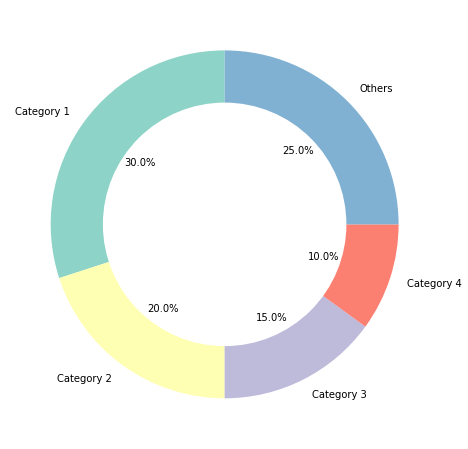

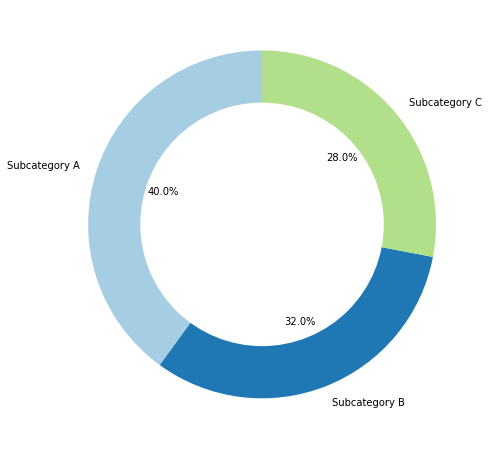

In [1]:
import matplotlib.pyplot as plt

# Data for the main pie chart
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Others']
values = [30, 20, 15, 10, 25]  # Values for each category (percentages or proportions)

# Data for the "Others" slice (sub-pie chart)
others_categories = ['Subcategory A', 'Subcategory B', 'Subcategory C']
others_values = [10, 8, 7]  # Values for each sub-category (percentages or proportions)

# Create the main pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (adjust as needed)
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)

# Draw a circle at the center to make it a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Create the "Others" sub-pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (adjust as needed)
plt.pie(others_values, labels=others_categories, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Draw a circle at the center to make it a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.show()


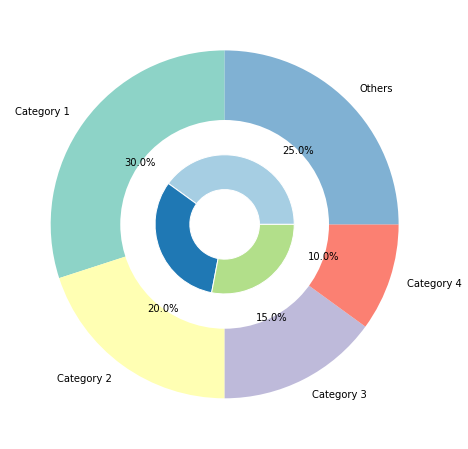

In [2]:
import matplotlib.pyplot as plt

# Data for the main pie chart
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Others']
main_values = [30, 20, 15, 10, 25]  # Values for each category (percentages or proportions)

# Data for the "Others" slice (sub-pie chart)
others_categories = ['Subcategory A', 'Subcategory B', 'Subcategory C']
others_values = [10, 8, 7]  # Values for each sub-category (percentages or proportions)

# Create the main pie chart
plt.figure(figsize=(8, 8))  # Set the figure size (adjust as needed)
outer_colors = plt.cm.Set3.colors
plt.pie(main_values, labels=categories, autopct='%1.1f%%', startangle=90, colors=outer_colors)

# Draw a circle at the center to make it a donut chart (optional)
center_circle = plt.Circle((0, 0), 0.6, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Create the "Others" sub-pie chart inside the "Others" slice of the main pie chart
plt.gca().pie(others_values, colors=plt.cm.Paired.colors, radius=0.4,
              wedgeprops=dict(width=0.2, edgecolor='w'))

# Equal aspect ratio ensures that the sub-pie chart is circular
plt.gca().set_aspect('equal')

plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
typ = ['Desktop', 'Laptop', 'Tablet', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Desktop']
src = ['Poster 1', 'Poster 4', 'Poster 4', 'Email', 'Poster 4', 'Poster 2', 'Poster 1', 'Poster 3', 'Poster 4', 'Poster 4', 'Poster 3', 'Poster 3', 'Website', 'Poster 3', 'Poster 2', 'Poster 1', 'Website', 'Website', 'Poster 1', 'Poster 3']
df = pd.DataFrame({'Product Type': typ, 'Source': src})

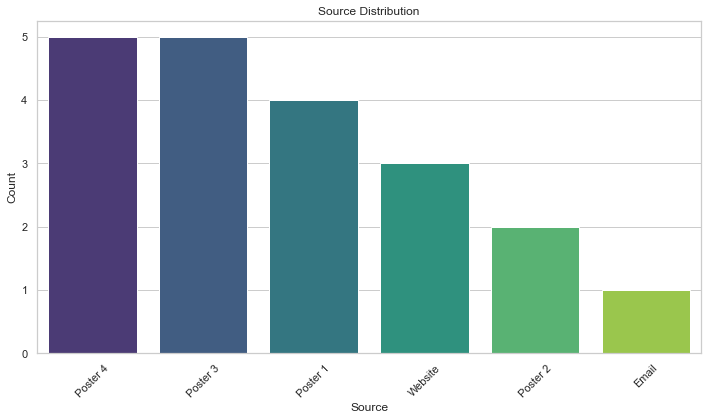

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

typ = ['Desktop', 'Laptop', 'Tablet', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Desktop', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Laptop', 'Laptop', 'Tablet', 'Tablet', 'Desktop']
src = ['Poster 1', 'Poster 4', 'Poster 4', 'Email', 'Poster 4', 'Poster 2', 'Poster 1', 'Poster 3', 'Poster 4', 'Poster 4', 'Poster 3', 'Poster 3', 'Website', 'Poster 3', 'Poster 2', 'Poster 1', 'Website', 'Website', 'Poster 1', 'Poster 3']
df = pd.DataFrame({'Product Type': typ, 'Source': src})

# Count the occurrences of each source
source_counts = df['Source'].value_counts()

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the column chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


<Axes: xlabel='Source', ylabel='count'>

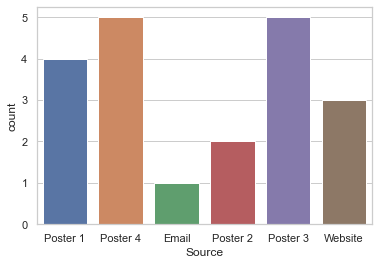

In [9]:
import seaborn as sns
sns.countplot(x='Source', data=df)

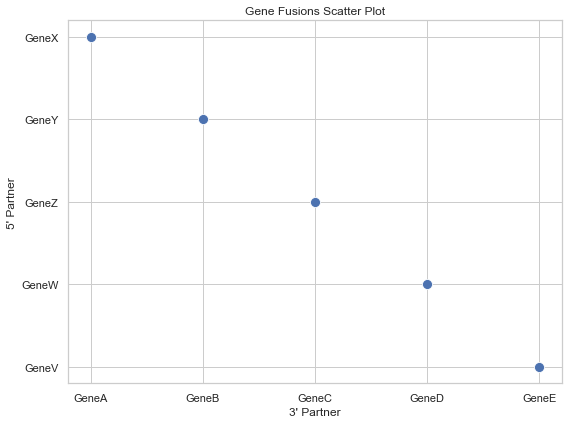

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample gene fusion data (replace this with your actual data)
data = {
    "3' partner": ['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'],
    "5' partner": ['GeneX', 'GeneY', 'GeneZ', 'GeneW', 'GeneV']
}

# Create the DataFrame
df_gene_fusions = pd.DataFrame(data)

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x="3' partner", y="5' partner", data=df_gene_fusions, s=100)

# Set labels and title
plt.xlabel("3' Partner")
plt.ylabel("5' Partner")
plt.title("Gene Fusions Scatter Plot")

# Show the plot
plt.tight_layout()
plt.show()


In [48]:
df1 = pd.read_csv("C:/Users/prksh/Downloads/GeneFuse_Pub/5gene3gene.tsv", sep="\t")

C:\Users\prksh\AppData\Local\Temp\ipykernel_33060\1776461954.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  mplt.set_xticklabels(mplt.get_xticklabels(), rotation=90)


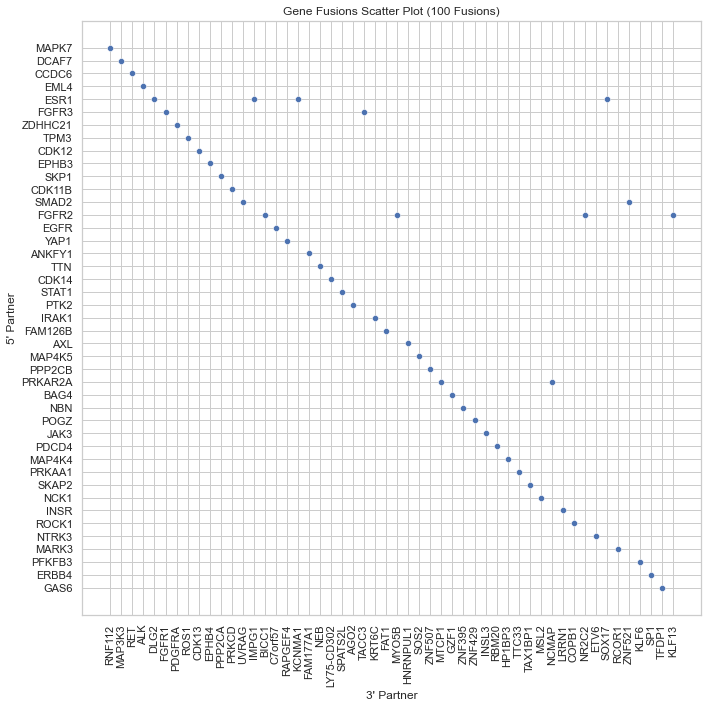

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Generate random gene names for 3' partner and 5' partner
genes_3_partner = df1['3gene']
genes_5_partner = df1['5gene']

# Create the DataFrame
df_gene_fusions = pd.DataFrame({'3\' partner': genes_3_partner, '5\' partner': genes_5_partner})

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the scatter plot using seaborn
plt.figure(figsize=(10,10))
mplt=sns.scatterplot(x="3' partner", y="5' partner", data=df_gene_fusions)

# Set labels and title
plt.xlabel("3' Partner")
plt.ylabel("5' Partner")
plt.title("Gene Fusions Scatter Plot (100 Fusions)")
mplt.set_xticklabels(mplt.get_xticklabels(), rotation=90)
# Show the plot
plt.tight_layout()
plt.show()


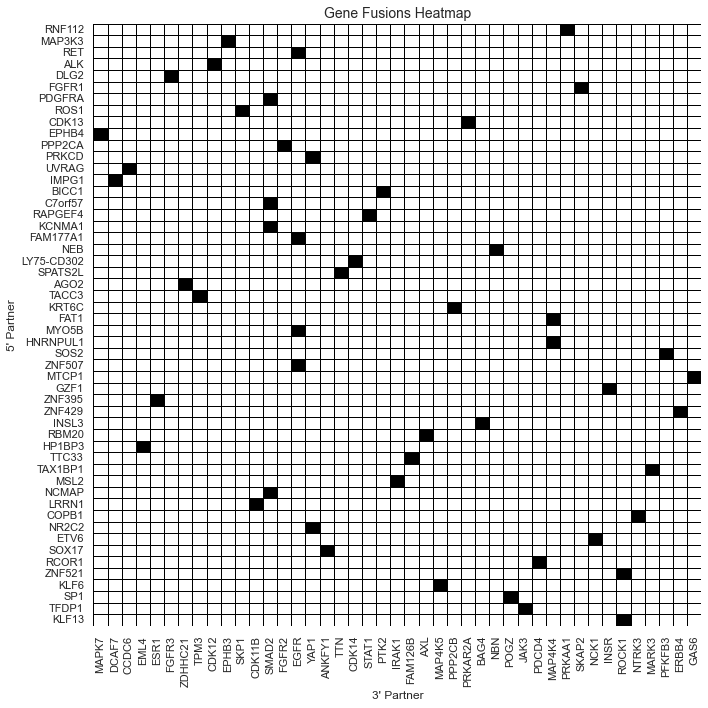

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming you already have a DataFrame df1 with columns '3gene' and '5gene'

# Generate random gene names for 3' partner and 5' partner
genes_3_partner = df1['3gene']
genes_5_partner = df1['5gene']

# Create the DataFrame
df_gene_fusions = pd.DataFrame({'3\' partner': genes_3_partner, '5\' partner': genes_5_partner})

# Get the cross-tabulation of gene fusions
gene_fusion_counts = pd.crosstab(df_gene_fusions['3\' partner'], df_gene_fusions['5\' partner'])

# Get the unique gene names to set the order in the heatmap
unique_genes_3_partner = df_gene_fusions['3\' partner'].unique()
unique_genes_5_partner = df_gene_fusions['5\' partner'].unique()

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(gene_fusion_counts, cmap='binary', annot=False, cbar=False, xticklabels=unique_genes_5_partner, yticklabels=unique_genes_3_partner, linewidths=0.5, linecolor='black')

# Set labels and title
plt.xlabel("3' Partner", fontsize=12)
plt.ylabel("5' Partner", fontsize=12)
plt.title("Gene Fusions Heatmap", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [52]:
df_gene_fusions

,3' partner,5' partner
0,RNF112,MAPK7
1,MAP3K3,DCAF7
2,RET,CCDC6
3,ALK,EML4
4,DLG2,ESR1
5,FGFR1,FGFR3
6,PDGFRA,ZDHHC21
7,ROS1,TPM3
8,CDK13,CDK12
9,EPHB4,EPHB3


C:\Users\prksh\AppData\Local\Temp\ipykernel_15704\1499527829.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x, y = df_gene_fusions.loc[df_gene_fusions['3\' partner'] == gene, ['3\' partner', '5\' partner']].mean()


ValueError: not enough values to unpack (expected 2, got 0)

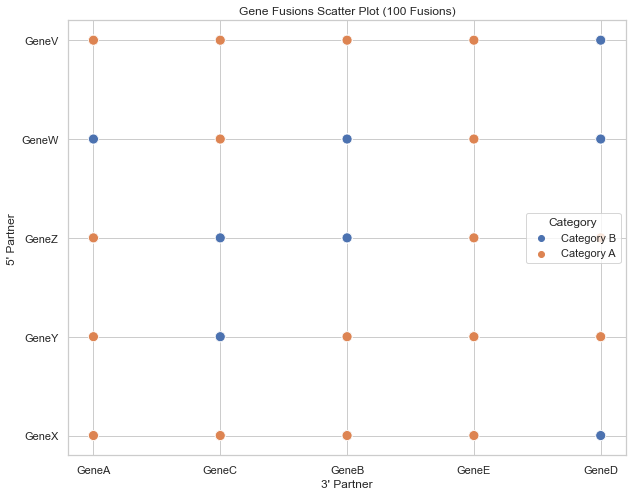

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of gene fusions to generate
num_fusions = 100

# Generate random gene names for 3' partner and 5' partner
genes_3_partner = np.random.choice(['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'], num_fusions)
genes_5_partner = np.random.choice(['GeneX', 'GeneY', 'GeneZ', 'GeneW', 'GeneV'], num_fusions)

# Create a random category assignment for each gene
categories = np.random.choice(['Category A', 'Category B'], len(genes_3_partner))

# Create the DataFrame
df_gene_fusions = pd.DataFrame({'3\' partner': genes_3_partner, '5\' partner': genes_5_partner, 'Category': categories})

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x="3' partner", y="5' partner", hue='Category', data=df_gene_fusions, s=100)

# Set labels and title
plt.xlabel("3' Partner")
plt.ylabel("5' Partner")
plt.title("Gene Fusions Scatter Plot (100 Fusions)")

# Annotate the axes to show categories
for gene in df_gene_fusions['3/' partner'].unique():
    category = df_gene_fusions.loc[df_gene_fusions['3/' partner'] == gene, 'Category'].values[0]
    x, y = df_gene_fusions.loc[df_gene_fusions['3/' partner'] == gene, ['3/' partner', '5/' partner']].mean()
    plt.text(x, y, f"{gene}/n{category}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')

for gene in df_gene_fusions['5/' partner'].unique():
    category = df_gene_fusions.loc[df_gene_fusions['5/' partner'] == gene, 'Category'].values[0]
    x, y = df_gene_fusions.loc[df_gene_fusions['5/' partner'] == gene, ['3/' partner', '5/' partner']].mean()
    plt.text(x, y, f"{gene}/n{category}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Show the legend
plt.legend(title='Category', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\prksh\AppData\Local\Temp\ipykernel_15704\2142675494.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x, y = df_gene_fusions.loc[df_gene_fusions['3\' partner'] == gene, ['3\' partner', '5\' partner']].mean()


ValueError: not enough values to unpack (expected 2, got 0)

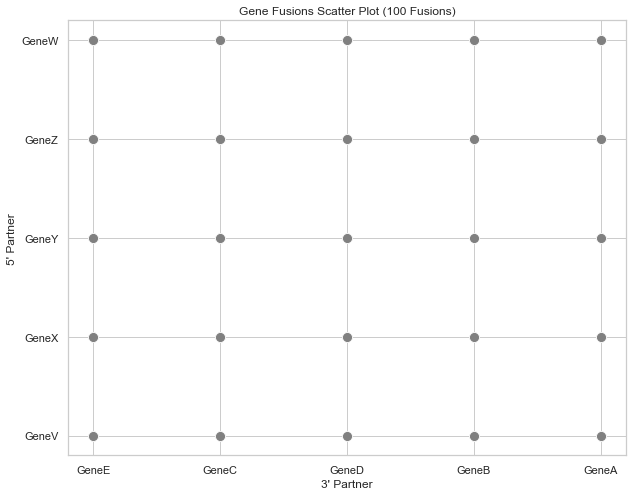

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of gene fusions to generate
num_fusions = 100

# Generate random gene names for 3' partner and 5' partner
genes_3_partner = np.random.choice(['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'], num_fusions)
genes_5_partner = np.random.choice(['GeneX', 'GeneY', 'GeneZ', 'GeneW', 'GeneV'], num_fusions)

# Create a random category assignment for each gene
categories = np.random.choice(['Category A', 'Category B'], len(genes_3_partner))

# Create the DataFrame
df_gene_fusions = pd.DataFrame({'3/' partner': genes_3_partner, '5/' partner': genes_5_partner, 'Category': categories})

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the scatter plot using seaborn, but without coloring the points
plt.figure(figsize=(10, 8))
sns.scatterplot(x="3' partner", y="5' partner", data=df_gene_fusions, s=100, color='gray')

# Set labels and title
plt.xlabel("3' Partner")
plt.ylabel("5' Partner")
plt.title("Gene Fusions Scatter Plot (100 Fusions)")

# Annotate the axes to show categories and color the axis labels based on the assigned categories
for gene in df_gene_fusions['3/' partner'].unique():
    category = df_gene_fusions.loc[df_gene_fusions['3/' partner'] == gene, 'Category'].values[0]
    x, y = df_gene_fusions.loc[df_gene_fusions['3/' partner'] == gene, ['3/' partner', '5/' partner']].mean()
    plt.text(x, y, f"{gene}/n{category}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    plt.axvline(x=x, color='gray', linestyle='dotted', alpha=0.5)

for gene in df_gene_fusions['5/' partner'].unique():
    category = df_gene_fusions.loc[df_gene_fusions['5/' partner'] == gene, 'Category'].values[0]
    x, y = df_gene_fusions.loc[df_gene_fusions['5/' partner'] == gene, ['3/' partner', '5/' partner']].mean()
    plt.text(x, y, f"{gene}/n{category}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')
    plt.axhline(y=y, color='gray', linestyle='dotted', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Number of gene fusions to generate
num_fusions = 100

# Generate random gene names for 3' partner and 5' partner
genes_3_partner = np.random.choice(['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'], num_fusions)
genes_5_partner = np.random.choice(['GeneX', 'GeneY', 'GeneZ', 'GeneW', 'GeneV'], num_fusions)

# Generate random categories for each gene
all_genes = np.concatenate((genes_3_partner, genes_5_partner))
categories = np.random.choice(['Category A', 'Category B'], len(all_genes))

# Create a DataFrame for gene categories
df_gene_categories = pd.DataFrame({'Gene': all_genes, 'Category': categories})

# Set the style for the plot (optional, for better aesthetics)
sns.set(style='whitegrid')

# Create the scatter plot using seaborn, but without coloring the points
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Gene", y="Gene", hue='Category', palette=['skyblue', 'salmon'], data=df_gene_categories, s=0)

# Set labels and title
plt.xlabel("3' and 5' Partner Genes")
plt.ylabel("3' and 5' Partner Genes")
plt.title("Gene Fusions Scatter Plot (100 Fusions)")

# Annotate the axes to show categories and color the axis labels based on the assigned categories
for gene in df_gene_categories['Gene'].unique():
    category = df_gene_categories.loc[df_gene_categories['Gene'] == gene, 'Category'].values[0]
    x = df_gene_categories.loc[df_gene_categories['Gene'] == gene, 'Gene'].value_counts().index.get_loc(gene)
    plt.axvline(x=x, color='gray', linestyle='dotted', alpha=0.5)
    plt.axhline(y=x, color='gray', linestyle='dotted', alpha=0.5)
    plt.text(x, x, f"{gene}/n{category}", ha='center', va='center', fontsize=8, fontweight='bold', color='white')

# Show the legend
plt.legend(title='Category', loc='upper right')

# Set x-axis and y-axis ticks
plt.xticks(np.arange(len(all_genes)), all_genes, rotation=45, ha='right')
plt.yticks(np.arange(len(all_genes)), all_genes)

# Show the plot
plt.tight_layout()
plt.show()


C:\Users\prksh\AppData\Local\Temp\ipykernel_33060\3198540575.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


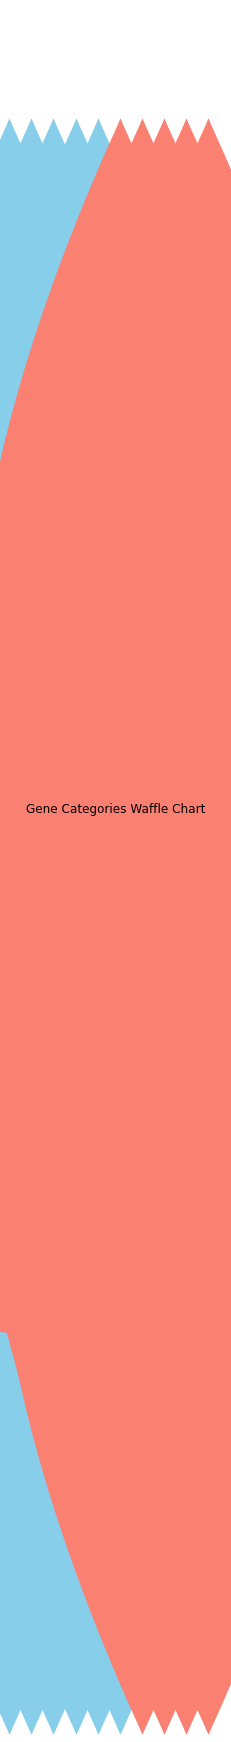

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle
import numpy as np

# Number of gene fusions to generate
num_fusions = 100

# Generate random gene names for 3' partner and 5' partner
genes_3_partner = np.random.choice(['GeneA', 'GeneB', 'GeneC', 'GeneD', 'GeneE'], num_fusions)
genes_5_partner = np.random.choice(['GeneX', 'GeneY', 'GeneZ', 'GeneW', 'GeneV'], num_fusions)

# Generate random categories for each gene
all_genes = np.concatenate((genes_3_partner, genes_5_partner))
categories = np.random.choice(['Category A', 'Category B'], len(all_genes))

# Create a DataFrame for gene categories
df_gene_categories = pd.DataFrame({'Gene': all_genes, 'Category': categories})

# Count the occurrences of each category
category_counts = df_gene_categories['Category'].value_counts()

# Create the waffle chart
fig = plt.figure(FigureClass=Waffle, rows=10, columns=10, values=category_counts, icons='child', colors=['skyblue', 'salmon'], legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)})

# Set title
plt.title("Gene Categories Waffle Chart")

# Show the plot
plt.tight_layout()
plt.show()


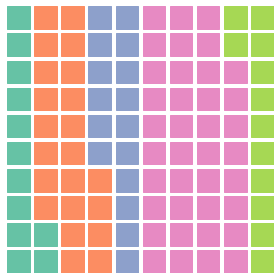

In [3]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

# Data
value = [12, 22, 16, 38, 12]

# Waffle chart
plt.figure(
    FigureClass = Waffle,
    rows = 10,
    values = value)

plt.show() 
 
 
 
